# Comparison of vehicular collisions across different seasons and times of the day

In [1]:
# First, we will load required packages
library(tidyverse)
library(repr)
library(readxl)
library(infer)
library(knitr)
library(broom)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Introduction

Car accidents have been among the leading causes of injuries and deaths around the world, leading all causes of preventable deaths globally in 2019 at nearly 1.3 million. (“International Overview,” n.d.). Furthermore, according to Transport Canada, environmental factors have consistently made up around or over 20% of all causes of car accidents in the country from 2015 to 2019 (Transport Canada, 2021). This project aims to investigate the relationship between the time and season-related changes and the occurrence of car accidents in Vancouver.

Taken from the Vancouver Police Department website, our dataset originally includes all crimes that occurred in the West Point Grey neighbourhood from 2003 to 2022 with relevant information recorded in separate variable columns (the headers of each column are shown in the parentheses):
- Type of crime (TYPE)
- Year of occurrence (YEAR)
- Month of occurrence (MONTH)
- Day of occurrence (DAY)
- Hour of occurrence (HOUR)
- Minute of occurrence (MINUTE)
- Hundred block of location (HUNDRED_BLOCK)
- Neighbourhood of location (NEIGHBOURHOOD)
- X-coordinate of location (X)
- Y-coordinate of location (Y)
Of all crimes, our crime types of interest are “Vehicle Collision or Pedestrian Struck (with Fatality)” and “Vehicle Collision or Pedestrian Struck (with Injury)”. The rest of the crimes will be filtered out.

Our inferential question will be to estimate the difference in proportions of car accidents that happen in the summer (which we classify as April to September) and winter (which we classify as October to March) and the difference in proportions of those that happen during daytime (which we classify as 6 am to 5:59 pm) and nightime (which we classify as 6 pm to 5:59 am)in Vancouver from 2003 to 2022, using the West Point Grey neighbourhood as a sample. We will then examine the difference in the two proportions to help us reach a possible conclusion.



## Preliminary Exploratory Data Analysis

In [2]:
# Data source: 
url <- "https://raw.githubusercontent.com/bernie-leung/STAT-201-group20newrepo/main/crimedata_csv_West%20Point%20Grey_AllYears.csv?token=GHSAT0AAAAAABWZIEUMCDZNWHJBZOIGRVVYYW4QFGA"

# Read data source
crimes <- read_csv(url)
head(crimes)

Rows: 9247 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2022,6,5,10,0,13XX DISCOVERY ST,West Point Grey,485246.9,5458027
Break and Enter Commercial,2004,6,30,0,1,13XX DISCOVERY ST,West Point Grey,485255.4,5458013
Break and Enter Commercial,2009,5,9,15,30,13XX DISCOVERY ST,West Point Grey,485255.4,5458013
Break and Enter Commercial,2009,8,22,20,30,13XX DISCOVERY ST,West Point Grey,485255.4,5458013
Break and Enter Commercial,2009,11,1,12,0,13XX DISCOVERY ST,West Point Grey,485255.4,5458013
Break and Enter Commercial,2011,3,31,12,0,13XX DISCOVERY ST,West Point Grey,485255.4,5458013


In [3]:
# created a data frame contraining only the crime types of interest 
collisions <- crimes %>%
    filter(TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)" | TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)") %>%
    mutate(MONTH = as_factor(MONTH))
    
head(collisions)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Vehicle Collision or Pedestrian Struck (with Fatality),2017,8,6,9,18,42XX BLOCK W 4TH AVE,West Point Grey,485442,5457333
Vehicle Collision or Pedestrian Struck (with Fatality),2021,10,10,23,25,42XX NAUTILUS CLS,West Point Grey,485300,5457357
Vehicle Collision or Pedestrian Struck (with Fatality),2007,11,20,1,44,42XX W 4TH AVE,West Point Grey,485442,5457333
Vehicle Collision or Pedestrian Struck (with Fatality),2020,9,28,17,9,W 10TH AVE / SASAMAT ST,West Point Grey,484785,5456806
Vehicle Collision or Pedestrian Struck (with Fatality),2019,5,23,14,22,W 4TH AVE / BLANCA ST,West Point Grey,484359,5457394
Vehicle Collision or Pedestrian Struck (with Fatality),2003,3,20,19,29,W 4TH AVE / HIGHBURY ST,West Point Grey,486350,5457336


In [4]:
# data frame that has been grouped by month and Number of observations for each month

collisions_by_month <- collisions %>%
    group_by(MONTH) %>%
    summarise(count = sum(MONTH == MONTH))

# Table: how many observations for each month

kable(collisions_by_month, caption = "Number of observations for each month")




Table: Number of observations for each month

|MONTH | count|
|:-----|-----:|
|1     |    27|
|2     |    21|
|3     |    28|
|4     |    33|
|5     |    41|
|6     |    32|
|7     |    42|
|8     |    38|
|9     |    38|
|10    |    37|
|11    |    27|
|12    |    20|

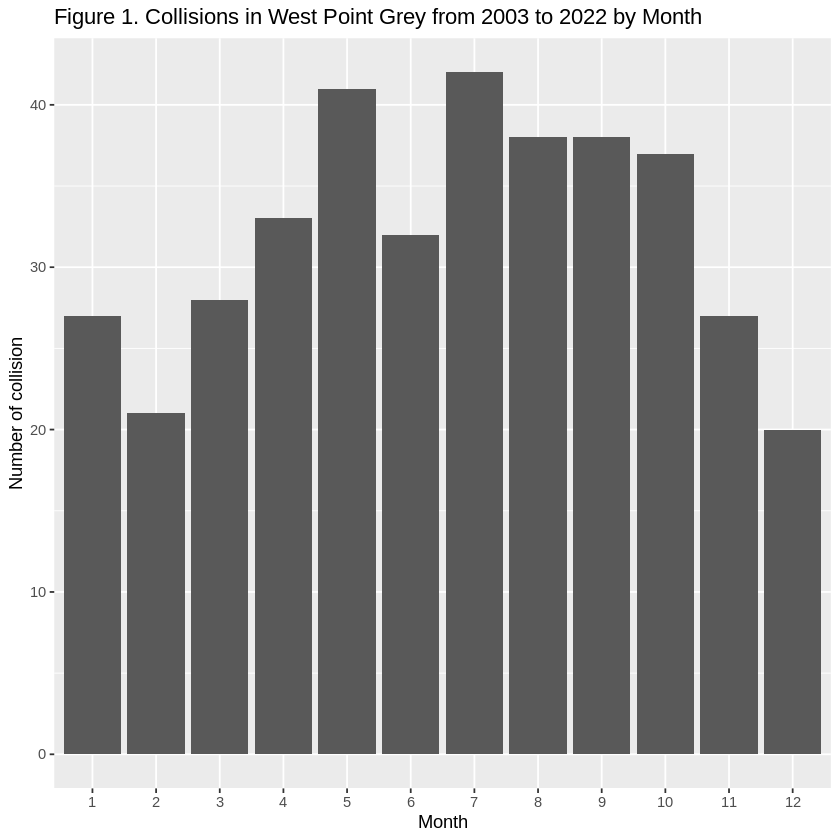

In [5]:
# visualize the oberservation 
collisions_graph_month <- collisions_by_month %>%
    ggplot(aes(x = MONTH, y = count)) +
    geom_bar(stat = "Identity") +
    labs(x = "Month", y = "Number of collision") +
    ggtitle("Figure 1. Collisions in West Point Grey from 2003 to 2022 by Month")

collisions_graph_month

As we can see from the graph, there are more number of collisions that happen in the summer (which we classify as April to September) than that happen in the winter (October to March) in West Point Grey neighbourhood from 2003 to 2022.

In [6]:
# data frame that has been grouped by hour and Number of observations for each type of crime
collisions_by_hour <- collisions %>%
    group_by(HOUR) %>%
    summarise(count = sum(HOUR == HOUR))

# Table: how many observations for each hour
kable(collisions_by_hour, caption = "Number of observations for each hour")



Table: Number of observations for each hour

| HOUR| count|
|----:|-----:|
|    0|     7|
|    1|     8|
|    2|     5|
|    3|     1|
|    4|     1|
|    5|     5|
|    6|     3|
|    7|    13|
|    8|    20|
|    9|    19|
|   10|    16|
|   11|    15|
|   12|    22|
|   13|     9|
|   14|    23|
|   15|    35|
|   16|    33|
|   17|    38|
|   18|    36|
|   19|    23|
|   20|    25|
|   21|    14|
|   22|    10|
|   23|     3|

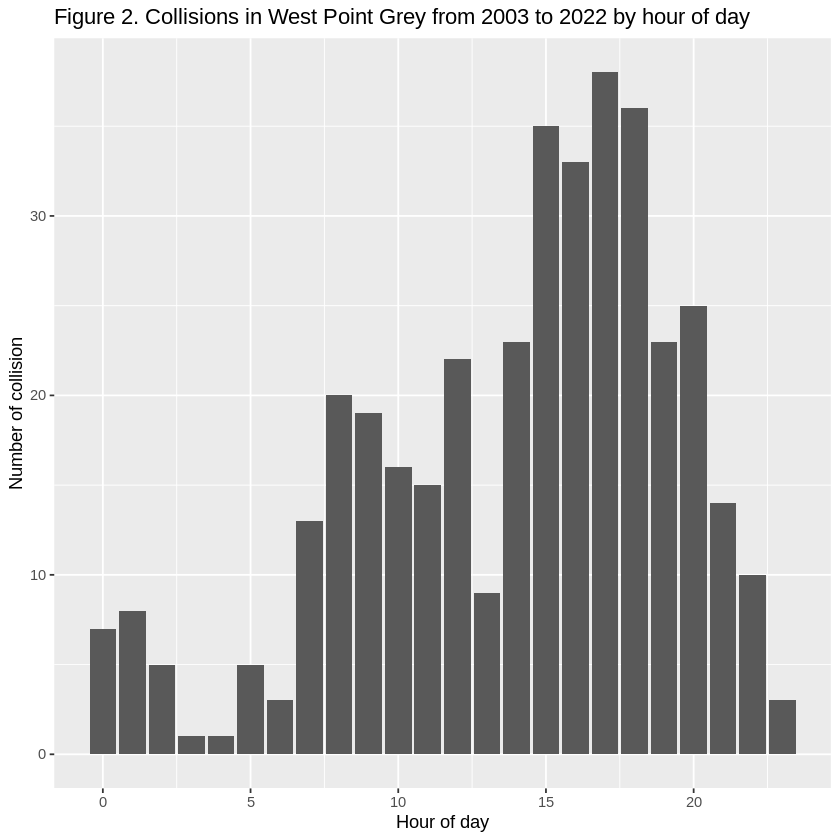

In [7]:
# visualize the observation 
collisions_graphs_hour <- collisions_by_hour %>%
    ggplot(aes(x = HOUR, y = count)) +
    geom_bar(stat = "Identity") +
    labs(x = "Hour of day", y = "Number of collision") +
    ggtitle("Figure 2. Collisions in West Point Grey from 2003 to 2022 by hour of day")
collisions_graphs_hour

### Estimates of the parameters

In [8]:
## draw a sample from the population to calculate the point estimate concerning the season
set.seed(11)
sample_prop_summer <- crimes %>%
    filter(TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)" | TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)") %>% 
    rep_sample_n(size = 100) %>% 
    filter(MONTH == 4| MONTH == 5| MONTH == 6| MONTH == 7| MONTH == 8| MONTH == 9) %>%
    nrow()/100

sample_prop_summer

[1] 0.55

This is the sample proportion of Vehicle collision in West Point Grey neighbourhood during summer.

In [9]:
set.seed(12)
sample_prop_winter <- crimes %>%
    filter(TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)" | TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)") %>%
    rep_sample_n(size = 100) %>%
    filter(MONTH == 10| MONTH == 11| MONTH == 12| MONTH == 1| MONTH == 2| MONTH == 3) %>% 
    nrow()/100

sample_prop_winter

[1] 0.45

This is the sample proportion of Vehicle collision in West Point Grey neighbourhood during winter.

In [10]:
## calculate the difference between two point estimates
diff_sample_props <- sample_prop_summer - sample_prop_winter
diff_sample_props

[1] 0.1

0.1 is the difference of the sample proportions between summer and winter.

In [11]:
## create a table to present the sample proportions

tab_prop <- matrix(c(0.55, 0.45, 0.1), ncol=3, byrow=TRUE)
colnames(tab_prop) <- c(" Summer sample prop ", " Winter sample prop ", " Difference in props ")
rownames(tab_prop) <- c("proportion")
tab_prop <- as.table(tab_prop)
tab_prop


            Summer sample prop   Winter sample prop   Difference in props 
proportion                 0.55                 0.45                  0.10

This table shows the sample proportions in summer and winter and their difference.

In [12]:
## draw a sample from the population to calculate the point estimate concerning hour of day
set.seed(10)
sample_prop_day <- crimes %>%
    filter(TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)" | TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)") %>% 
    rep_sample_n(size = 100) %>% 
    filter(HOUR == 6| HOUR == 7| HOUR == 8| HOUR == 9| HOUR == 10| HOUR == 11 | HOUR == 12| HOUR == 13| HOUR == 14| HOUR == 15| HOUR == 16| HOUR == 17) %>%
    nrow()/100

sample_prop_day

[1] 0.64

This is the sample proportion of Vehicle collision in West Point Grey neighbourhood during daytime.

In [13]:
set.seed(10)
sample_prop_night <- crimes %>%
    filter(TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)" | TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)") %>% 
    rep_sample_n(size = 100) %>% 
    filter(HOUR == 18| HOUR == 19| HOUR == 20| HOUR == 21| HOUR == 22| HOUR == 23 | HOUR == 0| HOUR == 1| HOUR == 2| HOUR == 3| HOUR == 4| HOUR == 5) %>%
    nrow()/100

sample_prop_night

[1] 0.36

This is the sample proportion of Vehicle collision in West Point Grey neighbourhood during nighttime.

In [14]:
## calculate the difference between two point estimates
diff_sample_props_time_of_day <- sample_prop_day - sample_prop_night
diff_sample_props_time_of_day

[1] 0.28

0.28 is the difference of the sample proportions between daytime and nighttime.

In [15]:
## create a table to present the sample proportions
tab_prop <- matrix(c(0.64, 0.36, 0.28), ncol=3, byrow=TRUE)
colnames(tab_prop) <- c(" Daytime sample prop ", " Nighttime sample prop ", " Difference in props ")
rownames(tab_prop) <- c("proportion")
tab_prop <- as.table(tab_prop)
tab_prop

            Daytime sample prop   Nighttime sample prop   Difference in props 
proportion                  0.64                    0.36                  0.28

This table shows the sample proportions in daytime and nighttime and their difference.

## Methods & Results
So far the advantages of our report are that it contains data from a credible source and that we have done a rough prelimnary analysis by computing the sample proportions of accidents that occur in each of the two seasons from our sample neighbourhood. However, the analysis done so far is only based on one sample from our chosen neighbourhood, which would make it hard for us to generalize our results to our population of all car accidents in Vancouver.

New data frames are created which contain SEASON and TIME_DAY columns which have values “SUMMER”, “WINTER” and “DAY”, “NIGHT” based on the month and time of day respectively.  
 
Since we are using a binary classification system for both season and time of day (the proportions of summer and winter collisions are dependent on one another, as are the propotions of daytime and nighttime collisions), conducting a independence hypothesis tests with season and time of day as explanatory variables would not be appropriate. Instead, since the proportions of summer and winter collisions as well as the propotions of daytime and nighttime collisions both add up to 1, we will simply set our hypotheses as follows:
 
1.     NULL HYPOTHESIS 
H0: The proportion of accidents in summer is equal to 0.5
                                        vs 
       ALTERNATE HYPOTHESIS
HA: The proportion of accidents in summer is not equal to 0.5
 
2.     NULL HYPOTHESIS 
H0: The proportion of accidents in daytime is equal to 0.5
                                        vs 
       ALTERNATE HYPOTHESIS
HA: The proportion of accidents in daytime is not equal to 0.5
 
The test statistic value will be then calculated for both cases which is followed by hypothesis testing using the infer package workflow to get corresponding p values and confidence intervals. Additionally, we will also inference through asymptotic methods by first performing manual calculations using the Central Limit Theorem, followed by a one sample z test using R.

For our tests we have decided to use a conservative significance level of 0.01 as we want to minimize the probability of us reporting a finding that occured by chance.



The first step is to create two data frames with our two variables of interest (season and time of day) respectively. Since we are only in vehicle collisions and not other crimes, we will also filter our datasets to reflect that.

In [97]:
## set up collision by season data frame
season <- crimes %>%
                        mutate(SEASON = ifelse(MONTH %in% 4:9, "SUMMER", "WINTER")) %>%
                        filter(TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)" | TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)")
head(season)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,SEASON
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Vehicle Collision or Pedestrian Struck (with Fatality),2017,8,6,9,18,42XX BLOCK W 4TH AVE,West Point Grey,485442,5457333,SUMMER
Vehicle Collision or Pedestrian Struck (with Fatality),2021,10,10,23,25,42XX NAUTILUS CLS,West Point Grey,485300,5457357,WINTER
Vehicle Collision or Pedestrian Struck (with Fatality),2007,11,20,1,44,42XX W 4TH AVE,West Point Grey,485442,5457333,WINTER
Vehicle Collision or Pedestrian Struck (with Fatality),2020,9,28,17,9,W 10TH AVE / SASAMAT ST,West Point Grey,484785,5456806,SUMMER
Vehicle Collision or Pedestrian Struck (with Fatality),2019,5,23,14,22,W 4TH AVE / BLANCA ST,West Point Grey,484359,5457394,SUMMER
Vehicle Collision or Pedestrian Struck (with Fatality),2003,3,20,19,29,W 4TH AVE / HIGHBURY ST,West Point Grey,486350,5457336,WINTER


In [98]:
## set up collision by time of the day data frame
time <- crimes %>%
                        mutate(TIME_DAY = ifelse(HOUR %in% 6:17, "DAY", "NIGHT")) %>%
                        filter(TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)" | TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)")
head(time)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,TIME_DAY
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Vehicle Collision or Pedestrian Struck (with Fatality),2017,8,6,9,18,42XX BLOCK W 4TH AVE,West Point Grey,485442,5457333,DAY
Vehicle Collision or Pedestrian Struck (with Fatality),2021,10,10,23,25,42XX NAUTILUS CLS,West Point Grey,485300,5457357,NIGHT
Vehicle Collision or Pedestrian Struck (with Fatality),2007,11,20,1,44,42XX W 4TH AVE,West Point Grey,485442,5457333,NIGHT
Vehicle Collision or Pedestrian Struck (with Fatality),2020,9,28,17,9,W 10TH AVE / SASAMAT ST,West Point Grey,484785,5456806,DAY
Vehicle Collision or Pedestrian Struck (with Fatality),2019,5,23,14,22,W 4TH AVE / BLANCA ST,West Point Grey,484359,5457394,DAY
Vehicle Collision or Pedestrian Struck (with Fatality),2003,3,20,19,29,W 4TH AVE / HIGHBURY ST,West Point Grey,486350,5457336,NIGHT


After obtaining our data of interest, we will conduct tests our simulation-based hypothesis tests. Since we are conducting a one proportion test using a binomial distribution, we will generate enter the argument "simulate" instead of "bootstrap" to sample directly from our null model where proportion of summer/daytime collisions = 0.5. We will also obtain a confidence interval of 99% to reflect our significance level of 0.01

In [124]:
## perform hypothesis test via simulation approach
set.seed(15)
hypo_test_season <- season %>%
    specify(response = SEASON, success = "SUMMER") %>%
    hypothesize(null = "point", p = 0.5) %>%
    generate(reps = 1000, type = "simulate") %>%
    calculate(stat = "prop")

season_ci <- hypo_test_season %>%
    get_ci(level = 0.99)


head(hypo_test_season)
season_ci

replicate,stat
<fct>,<dbl>
1,0.5625000
2,0.5052083
3,0.5130208
4,0.5078125
5,0.5234375
6,0.5312500


lower_ci,upper_ci
<dbl>,<dbl>
0.4375,0.5625


In [125]:
## perform hypothesis test via simulation approach
set.seed(16)
hypo_test_time <- time %>%
    specify(response = TIME_DAY, success = "DAY") %>%
    hypothesize(null = "point", p = 0.5) %>%
    generate(reps = 1000, type = "simulate") %>%
    calculate(stat = "prop")

time_ci <- hypo_test_time %>%
    get_ci(level = 0.99)

head(hypo_test_time)
time_ci

replicate,stat
<fct>,<dbl>
1,0.5078125
2,0.5104167
3,0.5390625
4,0.5260417
5,0.4765625
6,0.5338542


lower_ci,upper_ci
<dbl>,<dbl>
0.437487,0.5625


Now we will obtain the observed proportions from our original datasets to compare it to the results of our samples and obtain a p value.

In [126]:
## obtain the observed test statistic regarding season
obs_season <- season %>%
    specify(response = SEASON, success = "SUMMER") %>%
    calculate(stat = "prop") %>%
    pull()


## obtain the observed test statistic regarding time of the day
obs_time <- time %>%
    specify(response = TIME_DAY, success = "DAY") %>%
    calculate(stat = "prop") %>%
    pull()

obs_season
obs_time

[1] 0.5833333

[1] 0.640625

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


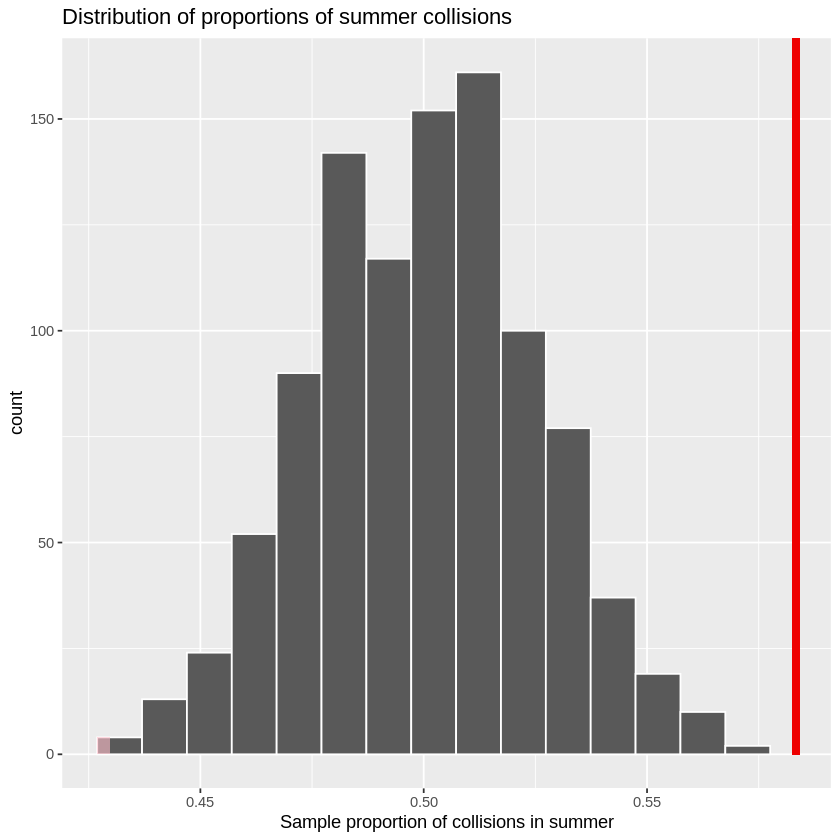

In [127]:
## visualize the hypothesis test regarding season
hypo_viz_season <- hypo_test_season %>%
    visualize() + 
    shade_p_value(obs_stat = obs_season, direction = "both") +
    labs(x = "Sample proportion of collisions in summer") +
    ggtitle("Distribution of proportions of summer collisions")

hypo_viz_season

## get the p-value regarding season
p_value_season <- hypo_test_season %>%
    get_p_value(obs_stat = obs_season, direction = "both")

p_value_season

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


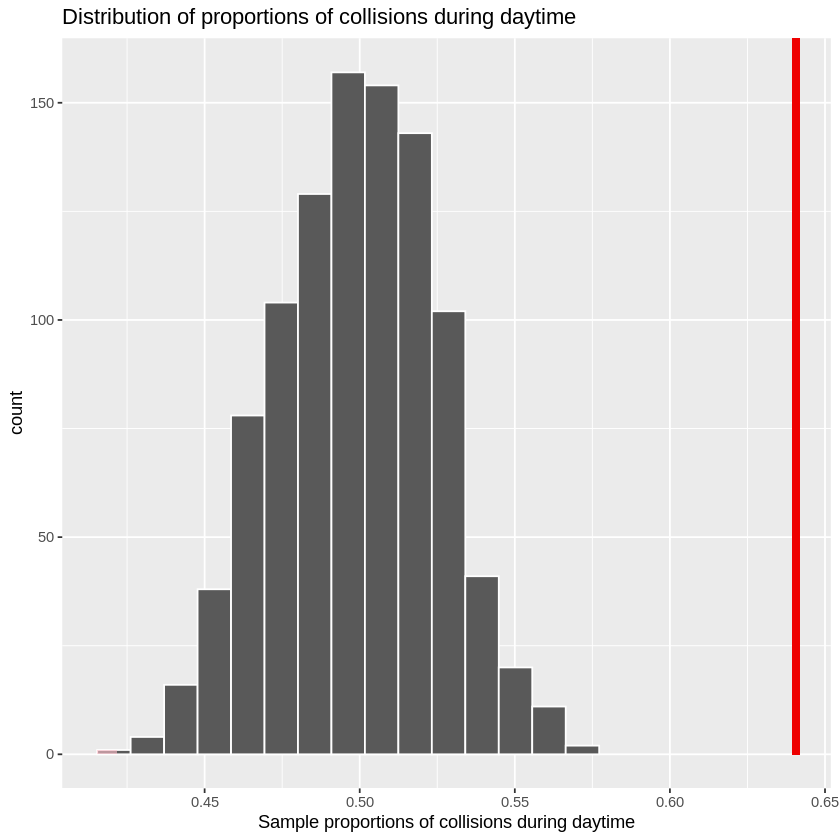

In [128]:
## visualize the hypothesis test regarding time of the day
hypo_viz_time <- hypo_test_time %>%
    visualize() + 
    shade_p_value(obs_stat = obs_time, direction = "both") +
    labs(x = "Sample proportions of collisions during daytime") +
    ggtitle("Distribution of proportions of collisions during daytime")

hypo_viz_time

## get the p-value regarding time of the day
p_value_time <- hypo_test_time %>%
    get_p_value(obs_stat = obs_time, direction = "both")

p_value_time

# report that p_value is less than 0.001 since we used 1000 reps

Our code above is returning a p value of 0 for both hypothesis tests. According to the get_p_value documentation, this occurence of this situation is likely due to the p value being less than 3 divided by the number of reps performed in our sampling. In our case of 1000 reps, this would indicate that our p values are likely less than 0.003, which satisfies our requirement of a p value less than 0.01 to reject our null hypotheses.

Next, we will conduct inferencing using asymptotic methods, starting with manual calculation based on the CLT. Since we are parameter is a proportion, we will be conducting one sample z-tests for our two variables of interest, using the following test statistic:

$$
Z = \frac{\hat{p} - p_0}{\sqrt{p_0(1-p_0)/n}}
$$

However, before we begin, we must ensure the size of our sample is large enough for the CLT to hold true. Using the rule of thumb provided in worksheet 8, we will test whether $n p_0 \geq 10$ and $n(1-p_0)\geq 10$. Since p0 is equal to 0.5 in our case, the two values are expected to be equal. 

In [129]:
p0 <- 0.5
n <- nrow(season)

n * p0
n * (1-p0)

[1] 192

[1] 192

Now that we have confirmed that our sample sizes are sufficiently large, we will conduct our manual z-test

In [130]:
## getting sample proportion regarding season
phat_season <- mean(season$SEASON == "SUMMER")
phat_season
p0 <- 0.5
n <- nrow(season) # n values are identitical across season and time datasets

## doing one-sample z-test regarding season
z_season <- (phat_season - p0)/sqrt(p0 * (1-p0) / n)
z_season

## getting sample proportion regarding time of the day
phat_time <- mean(time$TIME_DAY == "DAY")
phat_time

## doing one-sample z-test regarding time of the day
z_time <- (phat_time - p0)/sqrt(p0 * (1-p0) / n)
z_time

[1] 0.5833333

[1] 3.265986

[1] 0.640625

[1] 5.511352

We can now calculate our p values using the z values we obtained. Since the CLT states that given a sufficiently large sample size the null model of the test statistic is approximately normal, we can use the pnorm function to obtain our p value. 

In [131]:
## using asymptotics approach to get the p-value regarding season
asymp_p_value_season <- 2 * pnorm(z_season, lower.tail = FALSE)
asymp_p_value_season

## using asymptotics approach to get the p-value regarding time of the day
asymp_p_value_time <- 2 * pnorm(z_time, lower.tail = FALSE)
asymp_p_value_time

std_error_season <- sqrt(phat_season*(1-phat_season)/n)
std_error_time <- sqrt(phat_time*(1-phat_time)/n)

asymp_season_ci <- tibble(
    lower_ci = qnorm(0.005, mean = phat_season, sd = std_error_season),
    upper_ci = qnorm(0.995, mean = phat_season, sd = std_error_season)
)
asymp_season_ci

asymp_time_ci <- tibble(
    lower_ci = qnorm(0.005, mean = phat_time, sd = std_error_time),
    upper_ci = qnorm(0.995, mean = phat_time, sd = std_error_time)
)
asymp_time_ci


[1] 0.001090835

[1] 3.560879e-08

lower_ci,upper_ci
<dbl>,<dbl>
0.518529,0.6481377


lower_ci,upper_ci
<dbl>,<dbl>
0.5775543,0.7036957


As expected, the p values returned are much smaller than 0.003. However, there seems to be a difference between the simulation-based and theory-based confidence intervals. Our final step is to conduct our hypothesis test using the r function prop.test to confirm our findings from above.

In [132]:
## return detailed information about the hypothesis test regarding season
prop_test_season <- tidy(
        prop.test(
        x = phat_season * n,  # the number of successes,
        n = n,  # the number of trials, 
        p = 0.5, # p0 (i.e., the value of p under H0),
        alternative = "two.sided", # a two sided test to reflect our alternate hypothesis
        conf.level = 0.99, # our desired confidence level,
        correct = FALSE))

prop_test_season

## return detailed information about the hypothesis test regarding time of the day
prop_test_time <- tidy(
        prop.test(
        x = phat_time * n,  # the number of successes,
        n = n,  # the number of trials, 
        p = 0.5, # p0 (i.e., the value of p under H0),
        alternative = "two.sided", # a two sided test to reflect our alternate hypothesis
        conf.level = 0.99, # our desired confidence level,
        correct = FALSE))

prop_test_time

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>
0.5833333,10.66667,0.001090835,1,0.5176507,0.6461852,1-sample proportions test without continuity correction,two.sided


estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>
0.640625,30.375,3.560879e-08,1,0.5756582,0.7008148,1-sample proportions test without continuity correction,two.sided


Our prop tests indeed produce similar p values and confidence intervals for variables of interest, indicating a success in our theory-based calculations.

## Discussion

Ultimately, we expect to find a relationship between the changes in time and season and the occurrence of car accidents in Vancouver. We hope that if the said relationship is significant, it can help raise awareness to driving hazards in specific seasons and times of day. We also hope our findings can give rise to possible future investigations on third variables related to environmental changes that are possibly influencing our relationships of interest.

## References

International Overview. (2021, May 06). Retrieved from
    https://injuryfacts.nsc.org/international/international-overview/#:~:text=Motor-vehicle injuries are the,the world,
    with 84,000 fatalities.

Transport Canada. (2021, June 11). Canadian Motor Vehicle Traffic Collision Statistics: 2019. Retrieved from
    https://tc.canada.ca/en/road-transportation/statistics-data/canadian-motor-vehicle-traffic-collision-statistics-2019
